# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [32]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns #requires 0.9.0
from scipy import stats

sns.set()

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/cliff/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


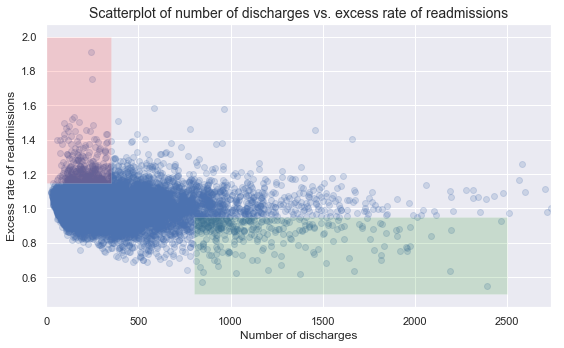

In [22]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

<h2>A. Do you agree with the above analysis and recommendations? Why or why not?</h2>

I do not agree with the above analysis.  The analysis only provides the mean and the proportion for those over 1.  they do not provide any statistical evidence for the claim.

<h2>B. Provide support for your arguments and your own recommendations with a statistically sound analysis:</h2>

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance.
   
<p><strong>H<sub>0</sub></strong> There is no difference between excess readmission in both groups.</p>
<strong>H<sub>a</sub></strong> There is a difference.

In [5]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [6]:
clean_hospital_read_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


Let's validate the data they provided to ensure we can duplicate their findings.

In [9]:
# How many hospitals are <100 and how many >1000
num_dis_df = clean_hospital_read_df['Number of Discharges']

num_less_hundred_df = len(num_dis_df[(num_dis_df < 100) & (num_dis_df > 0)])
num_great_thous_df = len(num_dis_df[num_dis_df > 1000])

print('Number of hospitals with less than 100 discharges:: ',num_less_hundred_df)
print('Number of hostitals with greater than 1000 discharges:: ', num_great_thous_df)

Number of hospitals with less than 100 discharges::  1188
Number of hostitals with greater than 1000 discharges::  463


In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1

In [15]:
less_hundred_df = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] < 100) & (clean_hospital_read_df['Number of Discharges'] > 0)]

# The mean
less_hundred_mean = np.mean(less_hundred_df['Excess Readmission Ratio'])

# The ratio of those greater than 1
excess_read_great_one_ratio = len(less_hundred_df[less_hundred_df['Excess Readmission Ratio'] > 1]) / len(less_hundred_df)

print('Acutal mean ', less_hundred_mean, ' matches 1.023.')
print('Actual ration ',excess_read_great_one_ratio, ' matches 63%.')

Acutal mean  1.0226183501683506  matches 1.023.
Actual ration  0.6321548821548821  matches 63%.


In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

In [16]:
greater_thous_df = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 1000)]

# The mean
greater_thous_mean = np.mean(greater_thous_df['Excess Readmission Ratio'])

# The ratio of those greater than 1
excess_read_great_one_thous_ratio = len(greater_thous_df[greater_thous_df['Excess Readmission Ratio'] > 1]) / len(greater_thous_df)

print('Acutal mean ', greater_thous_mean, ' matches 0.978.')
print('Actual ration ',excess_read_great_one_thous_ratio, ' matches 44%.')

Acutal mean  0.9783354211663071  matches 0.978.
Actual ration  0.4449244060475162  matches 44%.


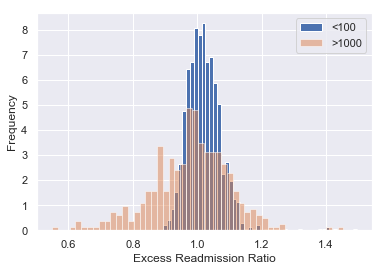

In [28]:
# Lets plot a comparison

_ = plt.hist(less_hundred_df['Excess Readmission Ratio'],bins=50,density=True)
_ = plt.hist(greater_thous_df['Excess Readmission Ratio'],bins=50,density=True,alpha=0.5)

_ = plt.xlabel('Excess Readmission Ratio')
_ = plt.ylabel('Frequency')

_ = plt.legend(('<100','>1000'))

plt.show()

In [30]:
# Lets take the split data and get the statistics
print('<100 Stats')
print(less_hundred_df['Excess Readmission Ratio'].describe())
print()
print('>1000 Stats')
print(greater_thous_df['Excess Readmission Ratio'].describe())

one_hundred_var = np.var(less_hundred_df['Excess Readmission Ratio'])
one_thous_var = np.var(greater_thous_df['Excess Readmission Ratio'])

print('<100 Variance ', one_hundred_var)
print('>100 Variance ', one_thous_var)

<100 Stats
count    1188.000000
mean        1.022618
std         0.057979
min         0.893500
25%         0.984900
50%         1.017750
75%         1.052925
max         1.495300
Name: Excess Readmission Ratio, dtype: float64

>1000 Stats
count    463.000000
mean       0.978335
std        0.120007
min        0.549500
25%        0.907900
50%        0.986400
75%        1.057100
max        1.454300
Name: Excess Readmission Ratio, dtype: float64
<100 Variance  0.003358688872025533
>100 Variance  0.01437065956607532


<h2>The Two Sample Z Test</h2>
<p>We are using a Two Sample Z Test since we know the standard deviations for the populations</p>
<p>https://www.cliffsnotes.com/study-guides/statistics/univariate-inferential-tests/two-sample-z-test-for-comparing-two-means</p>

That means::

<p><strong>H<sub>0</sub></strong>: &mu;<sub>1</sub>-&mu;<sub>2</sub> = 0


In [38]:
mu1 = np.mean(less_hundred_df['Excess Readmission Ratio'])
mu2 = np.mean(greater_thous_df['Excess Readmission Ratio'])

std1 = np.std(less_hundred_df['Excess Readmission Ratio'])
std2 = np.std(greater_thous_df['Excess Readmission Ratio'])

n1 = len(less_hundred_df['Excess Readmission Ratio'])
n2 = len(greater_thous_df['Excess Readmission Ratio'])

z_score = (mu1 - mu2)/np.sqrt((np.square(std1)/n1)+(np.square(std2)/n2))

print('z score ', z_score)


z score  7.6095459123357525


<h2>B - 2. Compute and report the observed significance value (or p-value).</h2>

In [42]:
# p-value

p_value = stats.norm.sf(abs(z_score))*2
print('p-value:: ',p_value)

p-value::  2.7506059007353298e-14


<h2>B - 3.  Report statistical significance for $\alpha$ = .01</h2>

In [45]:
sig = 0.01

print('Is the p-value less than the significance of ',sig,'',p_value < sig)

Is the p-value less than the significance of  0.01  True


Based on the fact, that the p-value is less than the $\alpha$ = .01 we can reject the null hypothesis and confidently state that there is a difference between the excess rate of readmissions between the two groups.

That means my original thoughts of the analysis were wrong and even though the study conclusion was based on pratical significance, our hypothesis testing provided statistical significance there there is a difference between excess rate or admissions between the two groups.
<p></p>
However, this is just one statistic we compared and there could be other features that should get examined to determine if the prescribed actions are appropriate.